# Distributions of Words & Sentences

This assignment is comprised of three tasks for ITCS 4111 and an additional task for ITCS 5111:

1. The first task is to compute the frequency vs. rank distribution of the words in Moby Dick. For this, you will need to tokenize the document and create a vocabulary mapping word types to their document frequency.
2. The second task is to segment the document into sentences and compute the sentence length distribution. Here you will experiment with spaCy's default sentence segmenter as well as the simple rule-based Sentencizer.
3. The third task is the same as the first except that we use subword tokenization.
4. Use spacy's NE recognizer to find all named entities in the first 2,500 paragraphs. Count how many times they appear in the document and consolidate them based on their most frequent type.

## Manish Kumar Govind:

# <font color="blue"> Submission Instructions</font>

1. Click the Save button at the top of the Jupyter Notebook.
2. Please make sure to have entered your name above.
3. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of ll cells). 
4. Select Cell -> Run All. This will run all the cells in order, and will take several minutes.
5. Once you've rerun everything, select File -> Download as -> PDF via LaTeX and download a PDF version showing the code and the output of all cells, and save it in the same folder that contains the notebook file.
6. Look at the PDF file and make sure all your solutions are there, displayed correctly. The PDF is the only thing we will see when grading!
7. Submit **both** your PDF and notebook on Canvas.
8. Make sure your your Canvas submission contains the correct files by downloading it after posting it on Canvas.

## Word distributions using the SpaCy tokenizer (40 + 10 points)

First, create the spaCy tokenizer.

In [203]:
from spacy.lang.en import English
nlp = English()

tokenizer = nlp.tokenizer

Create a *vocab* dictionary. This dictionary will map tokens to their counts in the input text file.

In [204]:
vocab = {}

Read the input file line by line.

1. Tokenize each line.
2. For each token in the line that contains only letters, convert it to lower case and increment the corresponding count in the dictionary.
    - If the token does not exist in the dictionary yet, insert it with a count of 1. For example, the first time the token 'water' is encountered, the code should evaluate *vocab['water'] = 1*.

At the end of this code segment, *vocab* should map each word type to the number of times it appeared in the entire document. There should be 16830 word types and 214287 words in Moby Dick.

In [205]:
with open('../data/melville-moby_dick.txt', 'r') as f:
    for line in f:
        tokens = tokenizer(line)
      
        for token in tokens:
            # Check if the token is a word (contains only letters)
            if token.is_alpha:
                # Convert the token to lowercase
                l_token = token.text.lower()

                # Check if the token is already in the dictionary
                if l_token in vocab:
                    # Increment the count in the dictionary
                    vocab[l_token] += 1
                else:
                    # Initialize the count to 1 if not present in the dictionary
                    vocab[l_token] = 1       
print('There are', len(vocab), 'word types in Moby Dick.')
print('There are', sum(vocab.values()), 'words in Moby Dick.')

There are 16830 word types in Moby Dick.
There are 214287 words in Moby Dick.


Create a list *ranked* of tuples *(word, freq)* that contains all the words in the vocabulary *vocab* sorted by frequency. For example, if *vocab = {'duck':2, 'goose':5, 'turkey':3}*, then *ranked = [('goose', 5), ('turkey', 3), ('duck', 2)]*. 

In [206]:
sorted_vocab = dict(sorted(vocab.items(), key=lambda item: item[1], reverse=True))

#  top 10 words with the highest frequencies

ranked = list(sorted_vocab.items()) 

Print the top 10 words in the sorted list.

In [207]:
print('Size of vocabulary:', len(ranked))
for word, freq in ranked[:10]:
    print(word, freq)

Size of vocabulary: 16830
the 14388
of 6606
and 6414
a 4698
to 4618
in 4164
that 3061
his 2527
it 2489
i 2068


Plot the frequency vs. rank of the top ranked words in Moby Dick.

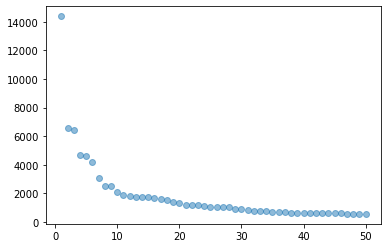

In [208]:
import matplotlib.pyplot as plt
ranks = range(1, 50 + 1)
freqs = [t[1] for t in ranked[:50]]
plt.scatter(ranks, freqs, c='#1f77b4', alpha=0.5)
plt.show()

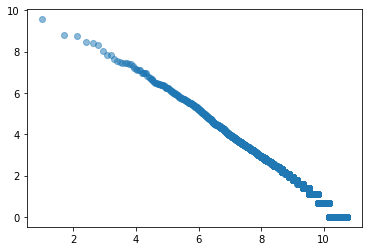

In [209]:
import math
ranks = [1 + math.log(r) for r in range(1, len(ranked) + 1)]
freqs = [math.log(t[1]) for t in ranked]
plt.scatter(ranks, freqs, c='#1f77b4', alpha=0.5)
plt.show()

---

## Sentence distributions (40 + 10 points)

First, try to create the spaCy nlp object from the entire text of Moby Dick. This will likely not work, it is not a good idea to read all the text.

In [210]:
import spacy

nlp = spacy.load("en_core_web_sm")
text = open('../data/melville-moby_dick.txt', 'r').read()
doc = nlp(text)

ValueError: [E088] Text of length 1220066 exceeds maximum of 1000000. The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

Instead, read the document paragraph by paragraph, i.e. in chunks of text separated by empty lines. Before using spaCy to segment a paragraph into sentences, replace each end of line character with a whitespace, to allow a sentence to span multiple lines. After sentence segmentation, for each sentence in the paragraph append its length (in tokens) to *lengths*. Use the default *nlp* class to process each paragraph and split it into sentences. Stop after processing 1000 paragraphs. This will be slow, so be patient.

17.19482159614563


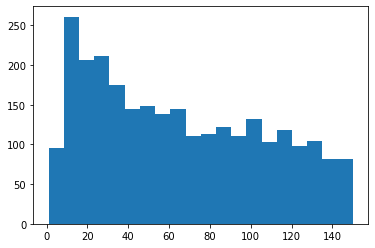

In [211]:
import spacy
import time

nlp = spacy.load("en_core_web_sm")

# the number of paragraphs read so far.
count = 0
# stores the length of each sentence processed so far.
lengths = []
sens=[]
paragraph = ""
flag = False
# make sure the file is read line by line.
start_time = time.time()
with open('../data/melville-moby_dick.txt', 'r') as f:
    # YOUR CODE GOES HERE
    for line in f :
        if line.strip():
            paragraph += line.strip() + ' '
            flag = True
        else:
            if flag :
                doc = nlp(paragraph)
                # Split the paragraph into sentences and append their lengths.
                for sentence in doc.sents:
                    #print(sentence.text  + "----line nene-------------------")
                    lengths.append(len(sentence.text))
                
                count += 1
                #print(count)
                paragraph = ""
                flag = False
        
        if count >= 1000:
            break
    
end_time = time.time()
tot_time  = end_time - start_time
print(tot_time)
len150 = [l for l in lengths if l <= 150]
plt.hist(len150, bins = 20)
plt.show()

Next, do the same processing as above, but use the more robust Sentencizer to split paragraphs into sentences. Note the speedup.

0.8420326709747314


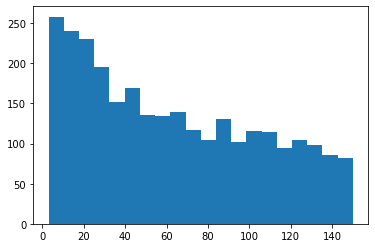

In [212]:
from spacy.lang.en import English
import time

nlp = English()
nlp.add_pipe("sentencizer")

# the number of paragraphs read so far.
count = 0
# stores the length of each sentence processed so far.
lengths = []
sens2 = []
paragraph = ""
flag = False
# make sure the file is read line by line.
start_time = time.time()
with open('../data/melville-moby_dick.txt', 'r') as f:
    # YOUR CODE GOES HERE
    for line in f :
        if line.strip():
            paragraph += line.strip() + ' '
            flag = True
        else:
            if flag :
                doc = nlp(paragraph)
                # Split the paragraph into sentences and append their lengths.
                for sentence in doc.sents:
                    #print(sentence.text  + "----line nene-------------------")
                    lengths.append(len(sentence.text))
                count += 1
                #print(count)
                paragraph = ""
                flag = False
        
        if count >= 1000:
            break
    
end_time = time.time()
tot_time_sentencizer  = end_time - start_time 
print(tot_time_sentencizer)
len150 = [l for l in lengths if l <= 150]
plt.hist(len150, bins = 20)
plt.show()

In [213]:
#speed up between twi approaches  
    
speed_up = tot_time / tot_time_sentencizer
print(speed_up)


20.420610967791806


Note the difference between the two histograms. Identify at least 5 examples of sentences in Moby Dick that are segmented differently by the two approaches. Copy them below and explain the differences. Which method seems to be more accurate?

---

# Difference in a segmenting sentences and Speedup
appraoch1 -- without sentencizer  pipeline
approach2 -- with sentencizer pipeline



sentence in approach   1    :   
1) Sw.<br />
2) and Dan.<br /> 
3) HVAL. <br />           
sentence in approach 2     :  
1) Sw. and Dan. HVAL.<br />                    

in approach 1 it sentencized into 3 sentences and in approach 2 only one  because in first approach after period it is considering as new sentence        

--------------------------------------------------------------------------

sentence in approach 1     :  

1) It is more immediately from the Dut.<br />
2) and Ger.   <br />         
sentence in approach 2    :   

1) It is more immediately from the Dut. and Ger.<br />


in approach one it sentencized into 2 sentences and in approach 2 only one because in first approach after period it is considering a new sentence 

--------------------------------------------------------------------------------
sentence in approach 1     :   
1) Among the former, one was of a most monstrous size. <br />
2) ...<br />

sentence in approach 2    :   
1) Among the former, one was of a most monstrous size. ...<br />

In this sentence after the period and space approach 1 splitted into 2 sentences but approach 2 considered as one sentence

------------------------------------------------------------------------------------
sentence in approach 1     :   
1) He visited this country also with a view of catching horse-whales, which had bones of very great                                value for their teeth, of which he brought some to the king.<br />
2)  ... <br />

sentence in approach 2    :   
1) He visited this country also with a view of catching horse-whales, which had bones of very great                                value for their teeth, of which he brought some to the king. ...<br />

In this sentence after the period and space approach 1 splitted into 2 sentences but approach 2 considered as one sentence


------------------------------------------------------------------------------------
sentence in approach 1     :      
1) APOLOGY<br />
2) FOR RAIMOND SEBOND.<br />

                               

sentence in approach 2    :     
1) APOLOGY FOR RAIMOND SEBOND<br />


--------------------------------------------------------------------------------------                               
sentence in approach 1     :     
1) IBID.<br /> 
2) "HISTORY OF LIFE AND DEATH."<br />

                               

sentence in approach 2    :    
1) IBID.  "HISTORY OF LIFE AND DEATH."<br />
                               
                                 
In approach one it sentencized into 2 sentences and in approach 2 only one because in first approach after period it is considering a new sentence 



Approach 2 is more accurate than Appraoch 1


## Word distribution using OpenAI's subword tokenization (30 points)

In this part, we will compute the frequency vs. rank based on the the BPE subword tokenization created by the [tiktoken module from OpenAI](https://github.com/openai/tiktoken).

Read the input file line by line.

1. Tokenize each line using `tiktoken` encoder and decoder for GPT-3.5.
2. For each token in the line that contains only letters, convert it to lower case and increment the corresponding count in the dictionary.
    - If the token does not exist in the dictionary yet, insert it with a count of 1. For example, the first time the token 'water' is encountered, the code should evaluate *vocab['water'] = 1*.

At the end of this code segment, *vocab* should map each word type to the number of times it appeared in the entire document. There should be 14619 unique types and 248615 total tokens in Moby Dick.

In [214]:
import tiktoken

# To get the tokeniser corresponding to a specific model in the OpenAI API:
enc = tiktoken.encoding_for_model("gpt-4")

vocab = {}
with open('../data/melville-moby_dick.txt', 'r') as f:
    for line in f:
        # YOUR CODE HERE
        line =  line.strip()
        
        if line :
            tokens = enc.encode(line)
            #print(tokens)
            for token in tokens:
                token = enc.decode_single_token_bytes(token)
                token = token.decode('utf-8').strip()
                if token.isalpha():
                  # Convert to lowercase
                    #token = token.lower()
                    vocab[token] = vocab.get(token, 0) + 1
        
                    
print('There are', len(vocab), 'unique tokens in Moby Dick.')
print('There are', sum(vocab.values()), 'tokens in Moby Dick.')

There are 14619 unique tokens in Moby Dick.
There are 248615 tokens in Moby Dick.


Rank the tokens based on their frequency, then plot frequency vs. rank.

In [215]:

sorted_vocab = dict(sorted(vocab.items(), key=lambda item: item[1], reverse=True))

#  top 10 words with the highest frequencies

ranked = list(sorted_vocab.items()) 

print('Size of vocabulary:', len(ranked))
for word, freq in ranked[:10]:
    print(word, freq)

Size of vocabulary: 14619
the 13739
of 6527
and 6024
a 4711
to 4582
in 4137
that 2982
his 2473
it 2260
I 2071


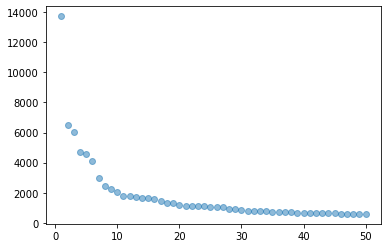

In [216]:
import matplotlib.pyplot as plt
ranks = range(1, 50 + 1)
freqs = [t[1] for t in ranked[:50]]
plt.scatter(ranks, freqs, c='#1f77b4', alpha=0.5)
plt.show()

---

## [5111] Named Entities (10 + 10 + 10 + 10 + 10 points)

Useful documentation is at:
- https://spacy.io/usage/linguistic-features#named-entities
- https://spacy.io/api/entityrecognizer

In [217]:
import spacy

nlp = spacy.load("en_core_web_sm")

# These are all the entity types covered by spaCy's NE recognizer.
nlp.pipe_labels['ner']

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

Read the first 2,500 paragraphs in Moby Dick and extract all named entities into a dictionary `ne_counts` that maps each *named entity* to its frequency. By *named entity* we mean a tuple *(name, type)* where *name* is the entity name as a string, and *type* is its entity type. For example, if the name 'Ahab' appears with the NE type 'PERSON' 50 times, then the dictionary should map the key *('Ahab', 'PERSON')* to the value *50*.

In [218]:
# The number of paragraphs read so far.
count = 0 
# Stores the dictionary of named entites and their counts.
ne_counts = {}

count = 0
# stores the length of each sentence processed so far.
lengths = []
paragraph = ""
flag = False

# make sure the file is read line by line.


with open('../data/melville-moby_dick.txt', 'r') as f:
    # YOUR CODE GOES HERE
    for line in f :
        
        if line.strip() :
            paragraph += line
            flag = True
        else:
            if flag :
                
                doc = nlp(paragraph.strip())
                for ent in doc.ents:
                        ne_tuple = (ent.text, ent.label_)
                        if ne_tuple in ne_counts:
                            ne_counts[ne_tuple] += 1
                        else:
                            ne_counts[ne_tuple] = 1
                count += 1
                #print(count)
                paragraph = ""
                lines =0
                flag = False
        
        if count >= 2500:
            break
    
for ne_tuple, frequency in ne_counts.items():
    print(ne_tuple, frequency)   



('Moby Dick', 'PERSON') 57
('Herman Melville', 'PERSON') 1
('Grammar School', 'ORG') 1
('Sw', 'ORG') 1
('Dan', 'PERSON') 3
('HVALT', 'ORG') 2
('WHALE', 'ORG') 9
('Ger', 'GPE') 1
('WALLEN', 'PERSON') 1
('A.S. WALW-IAN', 'ORG') 1
("--RICHARDSON'S", 'PERSON') 1
('KETOS', 'ORG') 1
('GREEK', 'NORP') 1
('CETUS', 'ORG') 1
('LATIN', 'PRODUCT') 1
('WHOEL', 'ORG') 1
('WAL', 'ORG') 1
('ENGLISH', 'FAC') 1
('FRENCH', 'NORP') 5
('PEKEE-NUEE-NUEE', 'PRODUCT') 2
('FEGEE', 'ORG') 1
('Vaticans', 'NORP') 1
('Leviathan', 'GPE') 44
('a Sub-Sub', 'ORG') 1
('Thou', 'PERSON') 27
('one', 'CARDINAL') 350
('Hampton Court', 'ORG') 1
('seven', 'CARDINAL') 4
('Gabriel', 'PERSON') 19
('Michael', 'PERSON') 1
('Raphael', 'ORG') 1
('--GENESIS', 'GPE') 1
('Leviathan maketh', 'WORK_OF_ART') 1
('Jonah', 'GPE') 38
('--PSALMS', 'ORG') 1
('that day', 'DATE') 7
('Leviathan', 'PERSON') 10
("--HOLLAND'S", 'WORK_OF_ART') 2
('Indian Sea', 'LOC') 1
('Whales', 'PERSON') 6
('Whirlpooles', 'PERSON') 1
('Balaene', 'PERSON') 1
('four a

('Rondeletius', 'ORG') 1
('Willoughby', 'PERSON') 1
('Green', 'PERSON') 1
('Artedi', 'GPE') 1
('Sibbald', 'GPE') 1
('Brisson', 'GPE') 1
('Lacepede', 'ORG') 1
('Bonneterre', 'PERSON') 1
('Desmarest', 'ORG') 1
('Baron Cuvier', 'PERSON') 1
('Frederick Cuvier', 'PERSON') 2
('Owen', 'PERSON') 4
('Scoresby', 'PERSON') 5
('Beale', 'GPE') 1
('Bennett', 'PERSON') 2
('J.  Ross Browne', 'PERSON') 1
('Miriam Coffin', 'GPE') 1
('Olmstead', 'PERSON') 1
('some seventy years', 'DATE') 1
('this present day', 'DATE') 1
('of past days', 'DATE') 1
('Charing\nCross', 'ORG') 1
('only two', 'CARDINAL') 2
('Beale', 'ORG') 4
('South-Sea', 'LOC') 2
('a minute', 'TIME') 4
('Post-Office', 'ORG') 1
('Job', 'GPE') 1
('Behold', 'PERSON') 1
('System of Nature', 'WORK_OF_ART') 1
('1776', 'DATE') 1
('the year 1850', 'DATE') 1
('Linnaeus', 'ORG') 2
('feminam mammis', 'GPE') 1
('Simeon Macey', 'PERSON') 1
('Charley Coffin', 'GPE') 2
('Charley', 'PERSON') 1
('Above,', 'ORG') 1
('Linnaeus', 'PERSON') 1
('Lamatins', 'LOC') 

('the Gay-Header', 'ORG') 1
('Koo-loo', 'PERSON') 1
('Grenadier', 'ORG') 1
('Tashtego!--give', 'GPE') 1
('Whole Atlantics and Pacifics', 'ORG') 1
('Pull up!--close to!', 'WORK_OF_ART') 1
('the\nday', 'DATE') 1
('gush', 'PERSON') 1
('gush', 'ORG') 1
('red gore', 'PERSON') 1
('CHAPTER 62', 'LAW') 1
('twenty or thirty feet', 'QUANTITY') 1
('four barrels', 'QUANTITY') 1
('CHAPTER 63', 'LAW') 1
('hurler', 'ORG') 1
('CHAPTER 64', 'LAW') 1
('eighteen', 'CARDINAL') 1
('thirty-six', 'CARDINAL') 1
('one hundred and eighty', 'CARDINAL') 1
('hour after hour', 'TIME') 1
('Hang-Ho', 'ORG') 1
('a mile', 'QUANTITY') 2
('Stubb', 'GPE') 1
('flavorish', 'NORP') 1
('About midnight', 'TIME') 1
('a few\ninches', 'TIME') 1
('Fleece', 'PERSON') 10
('Ebony', 'ORG') 1
('Belubed', 'PERSON') 1
('dan de shark', 'PERSON') 1
("bred'ren", 'PERSON') 1
('Gor', 'ORG') 1
('Massa Stubb', 'PERSON') 1
('cried--', 'ORG') 1
('Cussed', 'ORG') 1
('ninety', 'CARDINAL') 1
('Hind de hatchway', 'PERSON') 1
('de Roanoke', 'PERSON') 

('Drat', 'NORP') 1
('drat', 'NORP') 1
('SNEEZES', 'ORG') 2
('SNEEZES)--why', 'PERSON') 1
('SNEEZES)--yes', 'PERSON') 1
('Smut', 'PERSON') 1
('Mogulship', 'PERSON') 1
('TIMES', 'ORG') 1
('Prometheus', 'GPE') 1
('Africans', 'NORP') 1
('Prometheus', 'PERSON') 1
('Imprimis', 'ORG') 1
('about a quarter', 'CARDINAL') 1
('ho!', 'GPE') 1
('no;--a', 'CARDINAL') 1
('thou', 'ORDINAL') 4
('most solitary hours', 'TIME') 1
('Bungle', 'ORG') 1
('Praetorians', 'NORP') 1
('about one', 'CARDINAL') 1
('CHAPTER 109', 'LAW') 1
('Cabin', 'PRODUCT') 1
('Formosa', 'GPE') 1
('the Bashee Isles', 'FAC') 1
('Matsmai', 'PERSON') 1
('Sikoke', 'PERSON') 1
('new ivory', 'GPE') 1
('Up Burtons', 'WORK_OF_ART') 1
('a week', 'DATE') 1
('tinker', 'ORG') 1
('a year', 'DATE') 1
('twenty thousand miles', 'QUANTITY') 1
('Typhoons', 'ORG') 2
('keel.--On', 'ORG') 1
('me?--On', 'PERSON') 1
('Pequod.--On', 'ORG') 1
('Ahab\nbeware', 'PERSON') 1
('Burton', 'PERSON') 1
('Tierce', 'ORG') 1
('Aristotle', 'PERSON') 1
('Eternity', 'ORG'

Create a list `ranked_ne` containing all the items in the `ne_counts` dictionary that is sorted in descending order by their frequency.

In [219]:
sorted_items = dict(sorted(ne_counts.items(), key=lambda item: item[1], reverse=True))

ranked_ne = list(sorted_items.items()) # YOUR CODE GOES HERE

# This should display 2974 unique named entities, with the top two being
# ('Ahab', 'PERSON') 347 and ('one', 'CARDINAL') 335
print('Unique named entities:', len(ranked_ne))
for ne, count in ranked_ne[:50]:
    print(ne, count)

Unique named entities: 3001
('one', 'CARDINAL') 350
('Ahab', 'PERSON') 344
('two', 'CARDINAL') 205
('first', 'ORDINAL') 171
('Pequod', 'GPE') 152
('Starbuck', 'PERSON') 146
('three', 'CARDINAL') 134
('Queequeg', 'GPE') 114
('Queequeg', 'NORP') 98
('half', 'CARDINAL') 90
('Bildad', 'GPE') 65
('Nantucket', 'GPE') 58
('Moby Dick', 'PERSON') 57
('Peleg', 'PERSON') 55
('Indian', 'NORP') 48
('second', 'ORDINAL') 45
('Leviathan', 'GPE') 44
('four', 'CARDINAL') 41
('Tashtego', 'ORG') 40
('English', 'LANGUAGE') 39
('Jonah', 'GPE') 38
('Flask', 'ORG') 38
('Flask', 'GPE') 38
('Jonah', 'PERSON') 33
('Steelkilt', 'ORG') 30
('the White Whale', 'ORG') 29
('American', 'NORP') 28
('Pacific', 'LOC') 28
('Thou', 'PERSON') 27
('Greenland', 'GPE') 25
('Dutch', 'NORP') 22
('night', 'TIME') 22
('Lakeman', 'PERSON') 22
('Gabriel', 'PERSON') 19
('One', 'CARDINAL') 19
('Stubb', 'PERSON') 19
('New Bedford', 'GPE') 18
('midnight', 'TIME') 18
('Nantucketer', 'ORG') 18
('Christian', 'NORP') 17
('Yojo', 'PERSON') 17

### Consolidate named entities

Some names appear with more than one type, most often due to errors in named entity recognition. One way to fix such errors is to use the fact that typically a name occurs with just one meaning in a document, as such it has just one type. In this part of the assignment, we will consolidate the extracted names such that the counts for the same name appearing with multiple types are added together, and by associating the name with the type that it appears with most often.

Create a dictionary `ne_types` that maps each name to a dictionary that contains all the types the name appears with, where each type is mapped to the corresponding count. Use information from the dictionary `ne_counts` above.

In [220]:
# Create a dictionary to store the consolidated named entities
ne_types = {}

# Iterate through the ne_counts dictionary
for (name, ent_type), count in ne_counts.items():
    if name in ne_types:
        if ent_type in ne_types[name]:
            ne_types[name][ent_type] += count
        else:
            ne_types[name][ent_type] = count
    else:
        ne_types[name] = {ent_type: count}


print(ne_types['Queequeg']) # this should print {'GPE': 109, 'NORP': 98, 'PERSON': 4, 'LANGUAGE': 8}

print(ne_types['Gabriel']) # this should print {'PERSON': 18, 'ORG': 1}

{'NORP': 98, 'GPE': 114, 'PERSON': 4, 'LANGUAGE': 8}
{'PERSON': 19}


Create the consolidated dictionary `ne_cons` that maps each name to a tuple that contains its most frequent type and the total count over all types. Use information from the dictionary `ne_types` above.

In [221]:
# Create the consolidated dictionary ne_cons
ne_cons = {}

final_ne_types = {}

for name, type_counts in ne_types.items():
    most_frequent_type = max(type_counts, key=type_counts.get)
    final_ne_types[name] = most_frequent_type

# Iterate through the final_ne_types dictionary (from the previous step)
for name, most_frequent_type in final_ne_types.items():
    # Get the total count for the current name by summing all type counts
    total_count = sum(ne_types[name].values())
    # Create a tuple (most frequent type, total count) for the current name
    ne_cons[name] = (most_frequent_type, total_count)


print(ne_cons['Queequeg']) # this should print ('GPE', 219)

print(ne_cons['Gabriel']) # this should print ('PERSON', 19)

('GPE', 224)
('PERSON', 19)


Create a list `ranked_nec` that contains only the consolidated entries from `ne_cons` whose type is among the types listed in the list `types` below, sorted in descending order based on their total counts.

In [222]:
types = ['PERSON', 'GPE', 'ORG', 'LOC', 'FAC']

# YOUR CODE HERE

# Filter and sort the consolidated named entities
sort_ne = sorted(
    ((name, (ent_type, count)) for name, (ent_type, count) in ne_cons.items() if ent_type in types),
    key=lambda x: x[1][1],  
    reverse=True
)

# Create the ranked_nec list containing the filtered and sorted entries
ranked_nec = []
    
    
for name, (entity_type, count) in sort_ne:
        data = {}
        ne = (name , entity_type)
        data[ne]= count
        ranked_nec.append(data)
            


# This should display 1632 consolidated named entities, with the top two entries being
# Ahab ('PERSON', 347) and Queequeg ('GPE', 219)
# Display the number of consolidated named entities
print('Consolidated named entities:', len(ranked_nec))

# Print the top 30 entries
for entry in ranked_nec[:30]:
    for ne , count in entry.items():
        print(ne , count)

Consolidated named entities: 1668
('Ahab', 'PERSON') 344
('Queequeg', 'GPE') 224
('Pequod', 'GPE') 152
('Starbuck', 'PERSON') 146
('Flask', 'ORG') 87
('Bildad', 'GPE') 75
('Jonah', 'GPE') 71
('Nantucket', 'GPE') 69
('Moby Dick', 'PERSON') 57
('Peleg', 'PERSON') 55
('Leviathan', 'GPE') 54
('Tashtego', 'ORG') 42
('the White Whale', 'ORG') 34
('Thou', 'PERSON') 31
('the Sperm Whale', 'LOC') 30
('Steelkilt', 'ORG') 30
('Pacific', 'LOC') 28
('Greenland', 'GPE') 25
('Sperm Whale', 'PERSON') 24
('Lakeman', 'PERSON') 23
('Stubb', 'PERSON') 20
('Gabriel', 'PERSON') 19
('Radney', 'ORG') 19
('New Bedford', 'GPE') 18
('Nantucketer', 'ORG') 18
('Fedallah', 'PERSON') 18
('Ishmael', 'GPE') 17
('Aye', 'ORG') 17
('Yojo', 'PERSON') 17
('Atlantic', 'LOC') 16


**[Bonus points 1] (10 points)** Select one name from the dictionary `ne_counts` that appears frequently with 2 types and explain why you think spaCy's named entity recognizer associated the name with those 2 types.

Ans: {'NORP': 98, 'GPE': 114, 'PERSON': 4, 'LANGUAGE': 8}

for the name 'Queequeg' the NER of spacy recognizes into 4 different types . I think its because of the  sentences syntactic dependency  between object ,verb and subject


**[Bonus points 2] (20 points)** Find all the syntactic dependency paths connecting the subject Ahab with a direct object, e.g. 'Ahab' ---> nsubj ---> $<$verb$>$ ---> dobj ---> $<$object$>$. Rank all the object words based on how frequently they appear connected to 'Ahab' through this syntactic pattern, and for the top 10 objects display the list of verbs that are used with each object. 

Useful documentation is at:
- https://spacy.io/usage/linguistic-features#dependency-parse

In [223]:
# YOUR CODE HERE
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Dictionary to store object words and their associated verbs
obj_verbs = {}


count = 0
paragraph = ""
flag = False
# Read the text file line by line
with open('../data/melville-moby_dick.txt', 'r') as f:
    

    for line in f:
        if line.strip():
            paragraph += line.strip()
            flag = True
        else:
            if flag:
                doc = nlp(paragraph)
                for sentence in doc.sents:
                    for token in sentence:
                        if token.text == 'Ahab' and token.dep_ == 'nsubj' and token.head.dep_ == 'ROOT':
                                for child in token.head.children:
                                    if child.dep_ == 'dobj':
                                        word = child.text.lower()
                                        verb = token.head.text
                                        # Store the object word and associated verb
                                        if word in obj_verbs:
                                            obj_verbs[word].append(verb)
                                        else:
                                            obj_verbs[word] = [verb]
                count += 1
                paragraph = ""
                flag = False

            if count >= 2500:
                break

# Rank object words based on their frequency
sorted_obj_verbs = sorted(obj_verbs.items(), key=lambda x: len(x[1]), reverse=True)

# Display the top 10 object words and associated verbs
for object_word, verbs in sorted_obj_verbs[:10]:
    print(f"Object Word: {object_word}")
    print(f"Associated Verbs: {', '.join(verbs)}")





Object Word: humanities
Associated Verbs: has
Object Word: planks
Associated Verbs: paced
Object Word: ye
Associated Verbs: kicked
Object Word: he
Associated Verbs: kicked
Object Word: glimpse
Associated Verbs: had
Object Word: maze
Associated Verbs: threading
Object Word: prey
Associated Verbs: leaped
Object Word: that
Associated Verbs: knew
Object Word: sails
Associated Verbs: commanded
Object Word: reserve
Associated Verbs: manifested


***

## Bonus points

Anything extra goes here. For example:

* Write code Li (1992) showing that just random typing of letters including a space will generate “words” with a Zipfian distribution. Generate at least 1 million characters before your compute word frequencies.

  - Show mathematically that random typing results in a Zipf's distribution by computing probabilities for all words that contain just 1 letter, 2 letters, ...
  
* Implement the BPE algorithm, where you break ties by selecting to merge in lexicographic order. Train the BPE algorithm on a large corpus and then use it to do subword tokenization on the Mobby Dick corpus. What are the top 10 most frequenct tokens and how does it compare with what you got from `tiktokenizer`.


Top 10 Words and Frequencies:
x: 61
i: 59
f: 58
k: 58
w: 57
q: 57
h: 57
j: 57
u: 54
a: 53


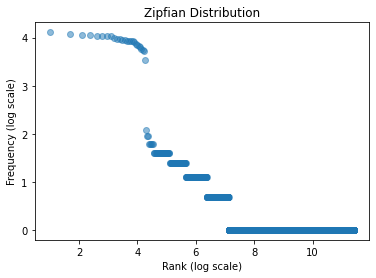

In [224]:
import random


# Set the seed for reproducibility
random.seed(50)

# Generate random text with spaces (1 million characters)
length = 1000000
random_text = ''.join(random.choice('abcdefghijklmnopqrstuvwxyz ') for _ in range(length))

# Split the random text into words based on spaces
words = random_text.split()

#print(words)

freq = {}

for word in words :
    freq[word] = freq.get(word, 0) + 1


sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
# top 10 words and their frequencies
print("Top 10 Words and Frequencies:")
for word, frequency in sorted_freq[:10]:
    print(f"{word}: {frequency}")

# Plot the word frequencies to visualize the Zipfian distribution
import matplotlib.pyplot as plt

# Get the frequencies and ranks
frequencies = [freq for _, freq in sorted_freq]
ranks = list(range(1, len(frequencies) + 1))


import math
ranks = [1 + math.log(r) for r in ranks]
freqs = [math.log(freq) for freq in frequencies]
plt.scatter(ranks, freqs, c='#1f77b4', alpha=0.5)
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Zipfian Distribution')
plt.show()


